Implement a KNN model to classify the animals in to categorie

In [42]:
import pandas as pd 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
animal_data=pd.read_csv("Zoo.csv")
animal_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


### Initial Investigation

In [6]:
animal_data.shape

(101, 18)

In [3]:
animal_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [4]:
animal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
animal_data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

### Model Building

In [11]:
X=animal_data.loc[:,'hair':'catsize']
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [13]:
Y=animal_data['type']
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.20,stratify=Y)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(80, 16)
(21, 16)
(80,)
(21,)


### Model Training

In [34]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [35]:
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

### Model Testing

In [37]:
Y_train_pred=knn_model.predict(X_train)
Y_train_pred

array([7, 3, 2, 4, 4, 1, 4, 4, 2, 1, 1, 1, 2, 7, 2, 1, 1, 1, 7, 4, 1, 1,
       4, 3, 1, 1, 1, 6, 1, 1, 5, 1, 2, 7, 7, 4, 4, 2, 1, 5, 2, 1, 1, 3,
       2, 7, 3, 1, 1, 2, 2, 6, 2, 1, 1, 4, 2, 6, 2, 1, 6, 7, 1, 1, 2, 1,
       1, 6, 2, 7, 1, 4, 1, 1, 1, 6, 5, 2, 1, 1], dtype=int64)

In [38]:
Y_test_pred=knn_model.predict(X_test)
Y_test_pred

array([5, 2, 4, 2, 1, 1, 4, 6, 1, 4, 7, 1, 1, 7, 1, 2, 3, 6, 1, 1, 2],
      dtype=int64)

### Model Evaluation

Tranining Data

In [40]:
accuracy_score(Y_train,Y_train_pred)

1.0

In [44]:
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



Testing Data

In [41]:
accuracy_score(Y_test,Y_test_pred)

1.0

In [46]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



### Parameter Tuning with Cross Validation

In [27]:
neigbours=list(range(1,50,2))
cv_scores =[]
for k in neigbours:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(estimator=knn,X=X,y=Y,cv=10,scoring='accuracy')
    cv_scores.append(score.mean())

In [28]:
cv_scores

[0.9800000000000001,
 0.95,
 0.8809090909090909,
 0.8418181818181818,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7718181818181818,
 0.7218181818181818,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.6436363636363637,
 0.5936363636363635,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5536363636363636,
 0.5436363636363637,
 0.5345454545454545]

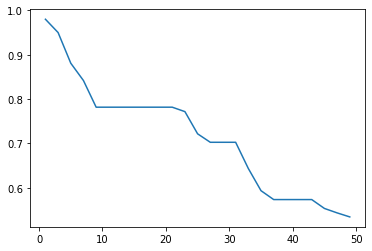

In [30]:
plt.plot(neigbours,cv_scores)

In [33]:
optimal_k_cv=neigbours[cv_scores.index(max(cv_scores))]
optimal_k_cv

1

Training Accuracy:100%
    
Testing Accuracy:100%

With the provided data,the machine is memorizing the patterns and it is not learning the patterns,so training accuracy is 100%